## AJUSTAR TODO EL SCRIPT PARA DEJARLO FINO Y TAMBIÉN DESCARGAR DATOS DE SPRINT PARA 2024

In [1]:
import os
import fastf1
import matplotlib.pyplot as plt
from fastf1 import get_event_schedule
import openpyxl
import pandas as pd
import numpy as np
import shutil
import time
import logging
# Configura el nivel de logging de fastf1
logging.getLogger('fastf1').setLevel(logging.ERROR)
try:
 fastf1.Cache.clear_cache()
except:
 pass

pd.set_option('display.max_columns', None)

# Creamos path dinámico para poder guardar los datos desde cualquier equipo
path = os.getcwd()
data_path = os.path.join(path,'Data')

# Función para extraer el formato mm:ss.SSS
def extraer_minutos_segundos(tiempo):
    if pd.isna(tiempo):
        return None
    tiempo_str = str(tiempo)
    if 'days' in tiempo_str:
        tiempo_str = tiempo_str.split(' ')[-1]  # Extraer hh:mm:ss.SSS
    minutos_segundos = tiempo_str.split(':')[-2:]  # Extraer mm:ss.SSS
    return ':'.join(minutos_segundos)


In [2]:
# Crea la carpeta 'cache' si no existe
os.makedirs('cache', exist_ok=True)

# Activa la caché
fastf1.Cache.enable_cache('cache')

# CALENDARIO

### DATA CLEANING

In [3]:
# Obtenemos calendario 2025

calendario_25 = get_event_schedule(2025)

# AJUSTAMOS COLUMNAS

# INDICAMOS CUANDO ES Pre-Season

calendario_25.loc[calendario_25['Session5']!="Race",'Session5'] = "Pre-Season"
calendario_25.loc[calendario_25['Session4']!="Qualifying",'Session4'] = "Pre-Season"
calendario_25.iloc[0,calendario_25.columns.get_loc('Session3')]= 'Pre-Season'
calendario_25.iloc[0,calendario_25.columns.get_loc('Session2')]='Pre-Season'
calendario_25.iloc[0,calendario_25.columns.get_loc('Session1')]='Pre-Season'

#CREAMOS HORA LOCAL DE TODAS LAS SESIONES 

#-- Función para ajustar la hora local --#
def ajustar_hora_local(session_date_utc):
    if pd.isna(session_date_utc):
        return None
    local_time = session_date_utc + pd.to_timedelta(1, unit='h')
    return local_time.strftime('%H:%M:%S')

# Aplicamos la función a todas las sesiones
for i in range(1, 6):
    calendario_25[f'Local_Time_Session{i}'] = calendario_25[f'Session{i}DateUtc'].apply(ajustar_hora_local)
    calendario_25[f'Date_Session_{i}'] = calendario_25[f'Session{i}DateUtc'].dt.date

#Eliminamos columnas que no necesitamos

calendario_25.drop(columns=["F1ApiSupport","Session1Date","Session1DateUtc","Session2Date","Session2DateUtc","Session3Date","Session3DateUtc","Session4Date",
                         "Session4DateUtc","Session5Date","Session5DateUtc"],inplace=True)
# Ordenamos las columnas

columnas_ordenadas = [
    'RoundNumber', 'Country', 'Location','OfficialEventName','EventFormat',
    'Session1', 'Date_Session_1', 'Local_Time_Session1',
    'Session2', 'Date_Session_2', 'Local_Time_Session2',
    'Session3', 'Date_Session_3', 'Local_Time_Session3',
    'Session4', 'Date_Session_4', 'Local_Time_Session4',
    'Session5', 'Date_Session_5', 'Local_Time_Session5'
]

calendario_25 = calendario_25.loc[:, columnas_ordenadas]

# Ajustamos nombre de las carreras

calendario_25['OfficialEventName'] = calendario_25['OfficialEventName'].str.replace('^FORMULA 1 ','',regex=True)

# Guardamos en formato CSV

calendario_25.to_csv(data_path+"\Calendario_25.csv",index=False)


In [5]:
calendario_25.head(15)

,RoundNumber,Country,Location,OfficialEventName,EventFormat,Session1,Date_Session_1,Local_Time_Session1,Session2,Date_Session_2,Local_Time_Session2,Session3,Date_Session_3,Local_Time_Session3,Session4,Date_Session_4,Local_Time_Session4,Session5,Date_Session_5,Local_Time_Session5
0,0,Bahrain,Sakhir,ARAMCO PRE-SEASON TESTING 2025,testing,Pre-Season,2025-02-26,08:00:00,Pre-Season,2025-02-27,08:00:00,Pre-Season,2025-02-28,08:00:00,Pre-Season,NaT,None,Pre-Season,NaT,None
1,1,Australia,Melbourne,LOUIS VUITTON AUSTRALIAN GRAND PRIX 2025,conventional,Practice 1,2025-03-14,02:30:00,Practice 2,2025-03-14,06:00:00,Practice 3,2025-03-15,02:30:00,Qualifying,2025-03-15,06:00:00,Race,2025-03-16,05:00:00
2,2,China,Shanghai,HEINEKEN CHINESE GRAND PRIX 2025,sprint_qualifying,Practice 1,2025-03-21,04:30:00,Sprint Qualifying,2025-03-21,08:30:00,Sprint,2025-03-22,04:00:00,Qualifying,2025-03-22,08:00:00,Race,2025-03-23,08:00:00
3,3,Japan,Suzuka,LENOVO JAPANESE GRAND PRIX 2025,conventional,Practice 1,2025-04-04,03:30:00,Practice 2,2025-04-04,07:00:00,Practice 3,2025-04-05,03:30:00,Qualifying,2025-04-05,07:00:00,Race,2025-04-06,06:00:00
4,4,Bahrain,Sakhir,GULF AIR BAHRAIN GRAND PRIX 2025,conventional,Practice 1,2025-04-11,12:30:00,Practice 2,2025-04-11,16:00:00,Practice 3,2025-04-12,13:30:00,Qualifying,2025-04-12,17:00:00,Race,2025-04-13,16:00:00
5,5,Saudi Arabia,Jeddah,STC SAUDI ARABIAN GRAND PRIX 2025,conventional,Practice 1,2025-04-18,14:30:00,Practice 2,2025-04-18,18:00:00,Practice 3,2025-04-19,14:30:00,Qualifying,2025-04-19,18:00:00,Race,2025-04-20,18:00:00
6,6,United States,Miami,CRYPTO.COM MIAMI GRAND PRIX 2025,sprint_qualifying,Practice 1,2025-05-02,17:30:00,Sprint Qualifying,2025-05-02,21:30:00,Sprint,2025-05-03,17:00:00,Qualifying,2025-05-03,21:00:00,Race,2025-05-04,21:00:00
7,7,Italy,Imola,AWS GRAN PREMIO DEL MADE IN ITALY E DELL'EMILI...,conventional,Practice 1,2025-05-16,12:30:00,Practice 2,2025-05-16,16:00:00,Practice 3,2025-05-17,11:30:00,Qualifying,2025-05-17,15:00:00,Race,2025-05-18,14:00:00
8,8,Monaco,Monaco,TAG HEUER GRAND PRIX DE MONACO 2025,conventional,Practice 1,2025-05-23,12:30:00,Practice 2,2025-05-23,16:00:00,Practice 3,2025-05-24,11:30:00,Qualifying,2025-05-24,15:00:00,Race,2025-05-25,14:00:00
9,9,Spain,Barcelona,ARAMCO GRAN PREMIO DE ESPAÑA 2025,conventional,Practice 1,2025-05-30,12:30:00,Practice 2,2025-05-30,16:00:00,Practice 3,2025-05-31,11:30:00,Qualifying,2025-05-31,15:00:00,Race,2025-06-01,14:00:00


In [6]:
# Visualizamos como se queda la tabla calendario
calendario_25.info()

<class 'fastf1.events.EventSchedule'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RoundNumber          25 non-null     int32 
 1   Country              25 non-null     object
 2   Location             25 non-null     object
 3   OfficialEventName    25 non-null     object
 4   EventFormat          25 non-null     object
 5   Session1             25 non-null     object
 6   Date_Session_1       25 non-null     object
 7   Local_Time_Session1  25 non-null     object
 8   Session2             25 non-null     object
 9   Date_Session_2       25 non-null     object
 10  Local_Time_Session2  25 non-null     object
 11  Session3             25 non-null     object
 12  Date_Session_3       25 non-null     object
 13  Local_Time_Session3  25 non-null     object
 14  Session4             25 non-null     object
 15  Date_Session_4       24 non-null     object
 16  Local_Time

## Analizamos los datos de la última carrera

## CLASIFICACIÓN

In [7]:
for i in range(10, 11):
        # is_sprint = calendario_25.iloc[i][4]
        # if is_sprint == 'sprint_qualifying': 
        #      print('Round number: ',calendario_25.iloc[i][0]," ",calendario_25.iloc[i][3],' is sprint Format')
        #      last_race = calendario_25.iloc[i]
        #      SQ_session = fastf1.get_session(2025, last_race['RoundNumber'], "SQ")
        #      SQ_session.load()
        #      SQ_results = SQ_session.results
        #      # Aplicar la función a las columnas Q1, Q2 y Q3
        #      SQ_results['Q1'] = SQ_results['Q1'].apply(extraer_minutos_segundos)
        #      SQ_results['Q2'] = SQ_results['Q2'].apply(extraer_minutos_segundos)
        #      SQ_results['Q3'] = SQ_results['Q3'].apply(extraer_minutos_segundos)
        #      df_SQ_Qualy = SQ_results[['DriverNumber','Abbreviation' ,'TeamName','Position','Q1','Q2','Q3']]
        #      df_SQ_Qualy['RoundNumber'] = SQ_session.event[0]
        #      df_SQ_Qualy['Roundname'] = SQ_session.event[1]
        #      df_SQ_Qualy['Year_Season'] = SQ_session.event[4].year
        #      df_SQ_Qualy['Position'] = df_SQ_Qualy['Position'].astype(int)
        #      df_SQ_Qualy['DriverNumber'] = df_SQ_Qualy['DriverNumber'].astype(int)
        #      ## APENDIZAMOS DATOS AL CSV
        #      file_exists = os.path.isfile(data_path+'\Sprint_Qualy_data.csv')
        #      if file_exists == True:
        #         df_SQ_Qualy.to_csv(data_path+"\Sprint_Qualy_data.csv",mode = 'a', index=False, header=False)
        #      else:
        #         df_SQ_Qualy.to_csv(data_path+"\Sprint_Qualy_data.csv" ,index=False)
                  
        # else:
        #     print('Round number: ',calendario_25.iloc[i][0]," ",calendario_25.iloc[i][3],' is Conventional Format')
        
    # if i == 1:
    #     last_race = calendario_25.iloc[i] 

    #     clasificacion_session = fastf1.get_session(2025, last_race['RoundNumber'], "Q")
    #     clasificacion_session.load()

    #     # La tabla de resultados con tiempos de Q1, Q2, Q3 y posición se encuentra en:
    #     clasificacion_results = clasificacion_session.results

    #     # Función para extraer el formato mm:ss.SSS
    #     def extraer_minutos_segundos(tiempo):
    #         if pd.isna(tiempo):
    #             return None
    #         tiempo_str = str(tiempo)
    #         if 'days' in tiempo_str:
    #             tiempo_str = tiempo_str.split(' ')[-1]  # Extraer hh:mm:ss.SSS
    #         minutos_segundos = tiempo_str.split(':')[-2:]  # Extraer mm:ss.SSS
    #         return ':'.join(minutos_segundos)

    #     # Aplicar la función a las columnas Q1, Q2 y Q3
    #     clasificacion_results['Q1'] = clasificacion_results['Q1'].apply(extraer_minutos_segundos)
    #     clasificacion_results['Q2'] = clasificacion_results['Q2'].apply(extraer_minutos_segundos)
    #     clasificacion_results['Q3'] = clasificacion_results['Q3'].apply(extraer_minutos_segundos)

    #     ### Elegimos las columnas que nos queremos quedar
    #     df_Qualy = clasificacion_results[['DriverNumber','DriverId','Abbreviation','TeamName','Q1', 'Q2', 'Q3', 'Position','TeamColor','HeadshotUrl']]
    #     df_Qualy['RoundNumber'] = clasificacion_session.event[0]
    #     df_Qualy['Roundname'] = clasificacion_session.event[1]
    #     df_Qualy['Year_Season'] = clasificacion_session.event[4].year
    #     df_Qualy['Position'] = df_Qualy['Position'].astype(int)
    #     df_Qualy['DriverNumber'] = df_Qualy['DriverNumber'].astype(int)

    #     ## VAMOS ALMACENANDO LOS DATOS EN UN CSV ##

    #     df_Qualy.to_csv(r'C:\Users\ejgar\OneDrive\Documentos\GitHub\F1_Analysis\Data\Qualy_data.csv',index=False)


    # else:
            last_race = calendario_25.iloc[i] 

            clasificacion_session = fastf1.get_session(2025, last_race['RoundNumber'], "Q")
            clasificacion_session.load()

            # La tabla de resultados con tiempos de Q1, Q2, Q3 y posición se encuentra en:
            clasificacion_results = clasificacion_session.results

            # Aplicar la función a las columnas Q1, Q2 y Q3
            clasificacion_results['Q1'] = clasificacion_results['Q1'].apply(extraer_minutos_segundos)
            clasificacion_results['Q2'] = clasificacion_results['Q2'].apply(extraer_minutos_segundos)
            clasificacion_results['Q3'] = clasificacion_results['Q3'].apply(extraer_minutos_segundos)

            ### Elegimos las columnas que nos queremos quedar
            df_Qualy = clasificacion_results[['DriverNumber','DriverId','Abbreviation','TeamName','Q1', 'Q2', 'Q3', 'Position','TeamColor','HeadshotUrl']]
            df_Qualy['RoundNumber'] = clasificacion_session.event[0]
            df_Qualy['Roundname'] = clasificacion_session.event[1]
            df_Qualy['Year_Season'] = clasificacion_session.event[4].year
            df_Qualy['Position'] = df_Qualy['Position'].astype(int)
            df_Qualy['DriverNumber'] = df_Qualy['DriverNumber'].astype(int)


            ## APENDIZAMOS DATOS AL CSV
            df_Qualy.to_csv(data_path+"\Qualy_data.csv",mode = 'a', index=False, header=False)


print(df_Qualy.iloc[0:1,[10,11,12]])


    RoundNumber Roundname  Year_Season
63           10    Canada         2025


C:\Users\ej.garcia\AppData\Local\Temp\ipykernel_18252\252935541.py:82: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_Qualy['RoundNumber'] = clasificacion_session.event[0]
C:\Users\ej.garcia\AppData\Local\Temp\ipykernel_18252\252935541.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Qualy['RoundNumber'] = clasificacion_session.event[0]
C:\Users\ej.garcia\AppData\Local\Temp\ipykernel_18252\252935541.py:83: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consi

In [8]:
df_Qualy.info()

<class 'fastf1.core.SessionResults'>
Index: 20 entries, 63 to 10
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DriverNumber  20 non-null     int32 
 1   DriverId      20 non-null     object
 2   Abbreviation  20 non-null     object
 3   TeamName      20 non-null     object
 4   Q1            20 non-null     object
 5   Q2            15 non-null     object
 6   Q3            10 non-null     object
 7   Position      20 non-null     int32 
 8   TeamColor     20 non-null     object
 9   HeadshotUrl   20 non-null     object
 10  RoundNumber   20 non-null     int32 
 11  Roundname     20 non-null     object
 12  Year_Season   20 non-null     int64 
dtypes: int32(3), int64(1), object(9)
memory usage: 2.0+ KB


In [9]:
df_Qualy.head()

,DriverNumber,DriverId,Abbreviation,TeamName,Q1,Q2,Q3,Position,TeamColor,HeadshotUrl,RoundNumber,Roundname,Year_Season
63,63,russell,RUS,Mercedes,01:12.075000,01:11.570000,01:10.899000,1,00D7B6,https://media.formula1.com/d_driver_fallback_i...,10,Canada,2025
1,1,max_verstappen,VER,Red Bull Racing,01:12.054000,01:11.638000,01:11.059000,2,4781D7,https://media.formula1.com/d_driver_fallback_i...,10,Canada,2025
81,81,piastri,PIA,McLaren,01:11.939000,01:11.715000,01:11.120000,3,F47600,https://media.formula1.com/d_driver_fallback_i...,10,Canada,2025
12,12,antonelli,ANT,Mercedes,01:12.279000,01:11.974000,01:11.391000,4,00D7B6,https://media.formula1.com/d_driver_fallback_i...,10,Canada,2025
44,44,hamilton,HAM,Ferrari,01:11.952000,01:11.885000,01:11.526000,5,ED1131,https://media.formula1.com/d_driver_fallback_i...,10,Canada,2025


In [10]:
df_Qualy.info()

<class 'fastf1.core.SessionResults'>
Index: 20 entries, 63 to 10
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DriverNumber  20 non-null     int32 
 1   DriverId      20 non-null     object
 2   Abbreviation  20 non-null     object
 3   TeamName      20 non-null     object
 4   Q1            20 non-null     object
 5   Q2            15 non-null     object
 6   Q3            10 non-null     object
 7   Position      20 non-null     int32 
 8   TeamColor     20 non-null     object
 9   HeadshotUrl   20 non-null     object
 10  RoundNumber   20 non-null     int32 
 11  Roundname     20 non-null     object
 12  Year_Season   20 non-null     int64 
dtypes: int32(3), int64(1), object(9)
memory usage: 2.0+ KB


## SPRINT RACE DATA

In [7]:
# Creamos una nueva caché para los datos de la carrera
os.makedirs('cache_SR', exist_ok=True)
fastf1.Cache.enable_cache('cache_SR')

last_race = calendario_25.iloc[2] 

Srace_session = fastf1.get_session(2025, last_race['RoundNumber'], "S")
Srace_session.load()

# La tabla de resultados
Srace_results = Srace_session.results

In [10]:
calendario_25.iloc[2][11]

C:\Users\ejgar\AppData\Local\Temp\ipykernel_15668\279504050.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calendario_25.iloc[2][11]


'Sprint'

## DATOS DE CARRERA

In [11]:
# Creamos una nueva caché para los datos de la carrera
fastf1.Cache.clear_cache()
os.makedirs('cache_new', exist_ok=True)
fastf1.Cache.enable_cache('cache_new')

for i in range(10, 11):
    #     is_sprint = calendario_25.iloc[i][11]
    #     if is_sprint == 'Sprint': 
    #          print('Round number: ',calendario_25.iloc[i][0]," ",calendario_25.iloc[i][3],' is sprint Format')
    #          last_race = calendario_25.iloc[i]
    #          SR_session = fastf1.get_session(2025, last_race['RoundNumber'], "S")
    #          SR_session.load()
    #          SR_results = SR_session.results
    #          SRace =SR_results[['Abbreviation','TeamName','ClassifiedPosition','GridPosition','Time','Status','Points','TeamColor','HeadshotUrl']]
    #           # Renombramos columnas
    #          SRace = SRace.rename(columns={
    #             'Abbreviation':'Name',
    #             'ClassifiedPosition':'FinalPosition',
    #             'GridPosition':'QualifyingPosition',
    #         })
    #          #Cambiamos tipo de datos a columnas
    #          SRace['Points'] = SRace['Points'].astype(int)
    #          SRace['QualifyingPosition'] = SRace['QualifyingPosition'].astype(int)

    #          #Creamos columna TotalTime
    #          tiempo_ganador = SRace['Time'][0]
    #          TotalTime = []
    #          for tiempo in SRace['Time']:
    #             if tiempo == tiempo_ganador:
    #                 TotalTime.append(tiempo)
    #             else:
    #                 TotalTime.append(tiempo_ganador + tiempo)
    #          SRace['TotalTime'] = TotalTime

    #         # Aplicar la función a las columnas Time y TotalTime
    #          SRace['Time'] = SRace['Time'].apply(extraer_minutos_segundos)
    #          SRace['TotalTime'] = SRace['TotalTime'].apply(extraer_minutos_segundos)

    #         # Añadimos el nombre de la carrera, el número de carrera y el año de la temporada

    #          SRace['RoundNumber']= SR_session.event[0]
    #          SRace['Roundname']= SR_session.event[1]
    #          SRace['Year_Season'] = SR_session.event[4].year

    #             ## APENDIZAMOS DATOS AL CSV
    #          file_exists = os.path.isfile(data_path+'\Sprint_Race_data.csv')
    #          if file_exists == True:
    #                 SRace.to_csv(data_path+"\Sprint_Race_data.csv",mode = 'a', index=False, header=False)
    #          else:
    #                 SRace.to_csv(data_path+"\Sprint_Race_data.csv" ,index=False)
                  
    #     else:
    #         print('Round number: ',calendario_25.iloc[i][0]," ",calendario_25.iloc[i][3],' is Conventional Format')

    

    #     # Ahora intenta obtener la sesión de carrera otra vez
    #     last_race = calendario_25.iloc[i] 
    #     race_session = fastf1.get_session(2025, last_race['RoundNumber'], "R")
    #     race_session.load()
    #     df_race = race_session.results

    #     df_race = df_race[['Abbreviation','TeamName','ClassifiedPosition','GridPosition','Time','Status','Points','TeamColor','HeadshotUrl']]

    #     # Renombramos columnas
    #     df_race = df_race.rename(columns={
    #         'Abbreviation':'Name',
    #         'ClassifiedPosition':'FinalPosition',
    #         'GridPosition':'QualifyingPosition',
    #     })

    #     #Cambiamos tipo de datos a columnas
    #     df_race['Points'] = df_race['Points'].astype(int)
    #     df_race['QualifyingPosition'] = df_race['QualifyingPosition'].astype(int)

    #     # Función para extraer el formato mm:ss.SSS
    #     def extraer_minutos_segundos(tiempo):
    #         if pd.isna(tiempo):
    #             return None
    #         tiempo_str = str(tiempo)
    #         if 'days' in tiempo_str:
    #             tiempo_str = tiempo_str.split(' ')[-1]  # Extraer hh:mm:ss.SSS
    #         # minutos_segundos = tiempo_str.split(':')[-2:]  # Extraer mm:ss.SSS
    #         # return ':'.join(minutos_segundos)
    #         return tiempo_str


    #     #Creamos columna TotalTime
    #     tiempo_ganador = df_race['Time'][0]
    #     TotalTime = []
    #     for tiempo in df_race['Time']:
    #         if tiempo == tiempo_ganador:
    #             TotalTime.append(tiempo)
    #         else:
    #             TotalTime.append(tiempo_ganador + tiempo)
    #     df_race['TotalTime'] = TotalTime

    #     # Aplicar la función a las columnas Time y TotalTime
    #     df_race['Time'] = df_race['Time'].apply(extraer_minutos_segundos)
    #     df_race['TotalTime'] = df_race['TotalTime'].apply(extraer_minutos_segundos)

    #     # Añadimos el nombre de la carrera, el número de carrera y el año de la temporada

    #     df_race['RoundNumber']= race_session.event[0]
    #     df_race['Roundname']= race_session.event[1]
    #     df_race['Year_Season'] = race_session.event[4].year

    #     ## Ajustamos tipo de datos en columnas
    #     # df_race['FinalPosition'] = df_race['FinalPosition'].astype(int)


    #     ## GUARDAMOS LOS DATOS EN UN CSV
    #     # df_race.to_csv(r'C:\Users\ejgar\OneDrive\Documentos\GitHub\F1_Analysis\Data\Race_data.csv',index=False)
    # else:
        
        # Ahora intenta obtener la sesión de carrera otra vez
        last_race = calendario_25.iloc[i] 
        race_session = fastf1.get_session(2025, last_race['RoundNumber'], "R")
        race_session.load()
        df_race = race_session.results

        df_race = df_race[['Abbreviation','TeamName','ClassifiedPosition','GridPosition','Time','Status','Points','TeamColor','HeadshotUrl']]

        # Renombramos columnas
        df_race = df_race.rename(columns={
            'Abbreviation':'Name',
            'ClassifiedPosition':'FinalPosition',
            'GridPosition':'QualifyingPosition',
        })

        #Cambiamos tipo de datos a columnas
        df_race['Points'] = df_race['Points'].astype(int)
        df_race['QualifyingPosition'] = df_race['QualifyingPosition'].astype(int)

        # Función para extraer el formato mm:ss.SSS
        def extraer_minutos_segundos(tiempo):
            if pd.isna(tiempo):
                return None
            tiempo_str = str(tiempo)
            if 'days' in tiempo_str:
                tiempo_str = tiempo_str.split(' ')[-1]  # Extraer hh:mm:ss.SSS
            # minutos_segundos = tiempo_str.split(':')[-2:]  # Extraer mm:ss.SSS
            # return ':'.join(minutos_segundos)
            return tiempo_str


        #Creamos columna TotalTime
        tiempo_ganador = df_race['Time'][0]
        TotalTime = []
        for tiempo in df_race['Time']:
            if tiempo == tiempo_ganador:
                TotalTime.append(tiempo)
            else:
                TotalTime.append(tiempo_ganador + tiempo)
        df_race['TotalTime'] = TotalTime

        # Aplicar la función a las columnas Time y TotalTime
        df_race['Time'] = df_race['Time'].apply(extraer_minutos_segundos)
        df_race['TotalTime'] = df_race['TotalTime'].apply(extraer_minutos_segundos)

        # Añadimos el nombre de la carrera, el número de carrera y el año de la temporada

        df_race['RoundNumber']= race_session.event[0]
        df_race['Roundname']= race_session.event[1]
        df_race['Year_Season'] = race_session.event[4].year

        ## Ajustamos tipo de datos en columnas
        # df_race['FinalPosition'] = df_race['FinalPosition'].astype(int)

        ## APENDIZAMOS DATOS AL CSV
        df_race.to_csv(data_path+'\Race_data.csv',mode = 'a', index=False, header=False)

print(df_race.iloc[0:1,10:-1])



    RoundNumber Roundname
63           10    Canada


C:\Users\ej.garcia\AppData\Local\Temp\ipykernel_18252\783785881.py:148: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tiempo_ganador = df_race['Time'][0]
C:\Users\ej.garcia\AppData\Local\Temp\ipykernel_18252\783785881.py:163: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_race['RoundNumber']= race_session.event[0]
C:\Users\ej.garcia\AppData\Local\Temp\ipykernel_18252\783785881.py:164: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [12]:
df_race.head(5)

,Name,TeamName,FinalPosition,QualifyingPosition,Time,Status,Points,TeamColor,HeadshotUrl,TotalTime,RoundNumber,Roundname,Year_Season
63,RUS,Mercedes,1,1,01:31:52.688000,Finished,25,00D7B6,https://media.formula1.com/d_driver_fallback_i...,01:31:52.688000,10,Canada,2025
1,VER,Red Bull Racing,2,2,00:00:00.228000,Finished,18,4781D7,https://media.formula1.com/d_driver_fallback_i...,01:31:52.916000,10,Canada,2025
12,ANT,Mercedes,3,4,00:00:01.014000,Finished,15,00D7B6,https://media.formula1.com/d_driver_fallback_i...,01:31:53.702000,10,Canada,2025
81,PIA,McLaren,4,3,00:00:02.109000,Finished,12,F47600,https://media.formula1.com/d_driver_fallback_i...,01:31:54.797000,10,Canada,2025
16,LEC,Ferrari,5,8,00:00:03.442000,Finished,10,ED1131,https://media.formula1.com/d_driver_fallback_i...,01:31:56.130000,10,Canada,2025


In [13]:
df_race.info()

<class 'fastf1.core.SessionResults'>
Index: 20 entries, 63 to 23
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Name                20 non-null     object
 1   TeamName            20 non-null     object
 2   FinalPosition       20 non-null     object
 3   QualifyingPosition  20 non-null     int32 
 4   Time                17 non-null     object
 5   Status              20 non-null     object
 6   Points              20 non-null     int32 
 7   TeamColor           20 non-null     object
 8   HeadshotUrl         20 non-null     object
 9   TotalTime           17 non-null     object
 10  RoundNumber         20 non-null     int32 
 11  Roundname           20 non-null     object
 12  Year_Season         20 non-null     int64 
dtypes: int32(3), int64(1), object(9)
memory usage: 2.0+ KB


## Hacemos lo mismo para el calendario 2024

In [4]:
# Obtenemos calendario_24 2025

calendario_24 = get_event_schedule(2024)

# AJUSTAMOS COLUMNAS

# INDICAMOS CUANDO ES Pre-Season

calendario_24.loc[calendario_24['Session5']!="Race",'Session5'] = "Pre-Season"
calendario_24.loc[calendario_24['Session4']!="Qualifying",'Session4'] = "Pre-Season"
calendario_24.iloc[0,calendario_24.columns.get_loc('Session3')]= 'Pre-Season'
calendario_24.iloc[0,calendario_24.columns.get_loc('Session2')]='Pre-Season'
calendario_24.iloc[0,calendario_24.columns.get_loc('Session1')]='Pre-Season'

#CREAMOS HORA LOCAL DE TODAS LAS SESIONES 

#-- Función para ajustar la hora local --#
def ajustar_hora_local(session_date_utc):
    if pd.isna(session_date_utc):
        return None
    local_time = session_date_utc + pd.to_timedelta(1, unit='h')
    return local_time.strftime('%H:%M:%S')

# Aplicamos la función a todas las sesiones
for i in range(1, 6):
    calendario_24[f'Local_Time_Session{i}'] = calendario_24[f'Session{i}DateUtc'].apply(ajustar_hora_local)
    calendario_24[f'Date_Session_{i}'] = calendario_24[f'Session{i}DateUtc'].dt.date

#Eliminamos columnas que no necesitamos

calendario_24.drop(columns=["F1ApiSupport","Session1Date","Session1DateUtc","Session2Date","Session2DateUtc","Session3Date","Session3DateUtc","Session4Date",
                         "Session4DateUtc","Session5Date","Session5DateUtc"],inplace=True)
# Ordenamos las columnas

columnas_ordenadas = [
    'RoundNumber', 'Country', 'Location','OfficialEventName','EventFormat',
    'Session1', 'Date_Session_1', 'Local_Time_Session1',
    'Session2', 'Date_Session_2', 'Local_Time_Session2',
    'Session3', 'Date_Session_3', 'Local_Time_Session3',
    'Session4', 'Date_Session_4', 'Local_Time_Session4',
    'Session5', 'Date_Session_5', 'Local_Time_Session5'
]

calendario_24 = calendario_24.loc[:, columnas_ordenadas]

# Ajustamos nombre de las carreras

calendario_24['OfficialEventName'] = calendario_24['OfficialEventName'].str.replace('^FORMULA 1 ','',regex=True)

# Guardamos en formato CSV

calendario_24.to_csv(r'C:\Users\ejgar\OneDrive\Documentos\GitHub\F1_Analysis\Data\Calendario_24.csv',index=False)

In [5]:
calendario_24.tail()

,RoundNumber,Country,Location,OfficialEventName,EventFormat,Session1,Date_Session_1,Local_Time_Session1,Session2,Date_Session_2,Local_Time_Session2,Session3,Date_Session_3,Local_Time_Session3,Session4,Date_Session_4,Local_Time_Session4,Session5,Date_Session_5,Local_Time_Session5
20,20,Mexico,Mexico City,GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024,conventional,Practice 1,2024-10-25,19:30:00,Practice 2,2024-10-25,23:00:00,Practice 3,2024-10-26,18:30:00,Qualifying,2024-10-26,22:00:00,Race,2024-10-27,21:00:00
21,21,Brazil,São Paulo,LENOVO GRANDE PRÊMIO DE SÃO PAULO 2024,sprint_qualifying,Practice 1,2024-11-01,15:30:00,Sprint Qualifying,2024-11-01,19:30:00,Sprint,2024-11-02,15:00:00,Qualifying,2024-11-03,11:30:00,Race,2024-11-03,16:30:00
22,22,United States,Las Vegas,HEINEKEN SILVER LAS VEGAS GRAND PRIX 2024,conventional,Practice 1,2024-11-22,03:30:00,Practice 2,2024-11-22,07:00:00,Practice 3,2024-11-23,03:30:00,Qualifying,2024-11-23,07:00:00,Race,2024-11-24,07:00:00
23,23,Qatar,Lusail,QATAR AIRWAYS QATAR GRAND PRIX 2024,sprint_qualifying,Practice 1,2024-11-29,14:30:00,Sprint Qualifying,2024-11-29,18:30:00,Sprint,2024-11-30,15:00:00,Qualifying,2024-11-30,19:00:00,Race,2024-12-01,17:00:00
24,24,United Arab Emirates,Yas Island,ETIHAD AIRWAYS ABU DHABI GRAND PRIX 2024,conventional,Practice 1,2024-12-06,10:30:00,Practice 2,2024-12-06,14:00:00,Practice 3,2024-12-07,11:30:00,Qualifying,2024-12-07,15:00:00,Race,2024-12-08,14:00:00


In [6]:
calendario_24.info()

<class 'fastf1.events.EventSchedule'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   RoundNumber          25 non-null     int64 
 1   Country              25 non-null     object
 2   Location             25 non-null     object
 3   OfficialEventName    25 non-null     object
 4   EventFormat          25 non-null     object
 5   Session1             25 non-null     object
 6   Date_Session_1       25 non-null     object
 7   Local_Time_Session1  25 non-null     object
 8   Session2             25 non-null     object
 9   Date_Session_2       25 non-null     object
 10  Local_Time_Session2  25 non-null     object
 11  Session3             25 non-null     object
 12  Date_Session_3       25 non-null     object
 13  Local_Time_Session3  25 non-null     object
 14  Session4             25 non-null     object
 15  Date_Session_4       24 non-null     object
 16  Local_Time

# SIGUIENTE PARTE DEL ANALISIS

In [3]:
race = fastf1.get_event(2025,5)

In [4]:
sesion = fastf1.get_session(2025,5,'Practice 2')
sesion.load()

In [5]:
Tyres = sesion.laps.pick_tyre("SOFT")
# laps_ALO = sesion.laps.pick_driver('ALO')
# laps_ALO = laps_ALO[['LapNumber','LapTime']]
# laps_ALO['Driver'] = "ALO"

# laps_VER = sesion.laps.pick_driver('VER')
# laps_VER = laps_ALO[['LapNumber','LapTime']]
# laps_VER['Driver'] = "VER"

c:\Users\ej.garcia\AppData\Local\anaconda3\Lib\site-packages\fastf1\core.py:3213: FutureWarning: pick_tyre is deprecated and will be removed in a future release. Use pick_compound instead.
  warnings.warn(("pick_tyre is deprecated and will be removed"


In [6]:
Tyres.info()

<class 'fastf1.core.Laps'>
Index: 142 entries, 7 to 388
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                142 non-null    timedelta64[ns]
 1   Driver              142 non-null    object         
 2   DriverNumber        142 non-null    object         
 3   LapTime             86 non-null     timedelta64[ns]
 4   LapNumber           142 non-null    float64        
 5   Stint               142 non-null    float64        
 6   PitOutTime          44 non-null     timedelta64[ns]
 7   PitInTime           44 non-null     timedelta64[ns]
 8   Sector1Time         110 non-null    timedelta64[ns]
 9   Sector2Time         140 non-null    timedelta64[ns]
 10  Sector3Time         140 non-null    timedelta64[ns]
 11  Sector1SessionTime  110 non-null    timedelta64[ns]
 12  Sector2SessionTime  140 non-null    timedelta64[ns]
 13  Sector3SessionTime  140 non-null    timedelta64[ns]

In [9]:
Tyres.head(20)


,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,SpeedI2,SpeedFL,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
7,0 days 00:39:15.099000,VER,1,NaT,8.0,2.0,0 days 00:37:24.914000,NaT,NaT,0 days 00:00:35.808000,0 days 00:00:31.806000,NaT,0 days 00:38:43.455000,0 days 00:39:15.177000,244.0,240.0,307.0,305.0,False,SOFT,1.0,True,Red Bull Racing,0 days 00:29:31.629000,2025-04-18 17:15:21.112,1,NaN,False,,False,False
8,0 days 00:40:43.646000,VER,1,0 days 00:01:28.547000,9.0,2.0,NaT,NaT,0 days 00:00:32.161000,0 days 00:00:28.029000,0 days 00:00:28.357000,0 days 00:39:47.260000,0 days 00:40:15.289000,0 days 00:40:43.646000,295.0,326.0,308.0,332.0,True,SOFT,2.0,True,Red Bull Racing,0 days 00:39:15.099000,2025-04-18 17:25:04.582,1,NaN,False,,False,True
9,0 days 00:43:07.209000,VER,1,0 days 00:02:23.563000,10.0,2.0,NaT,0 days 00:43:06.100000,0 days 00:00:56.291000,0 days 00:00:44.799000,0 days 00:00:42.473000,0 days 00:41:39.937000,0 days 00:42:24.736000,0 days 00:43:07.209000,143.0,199.0,NaN,207.0,False,SOFT,3.0,True,Red Bull Racing,0 days 00:40:43.646000,2025-04-18 17:26:33.129,1,NaN,False,,False,False
20,0 days 01:15:11.792000,VER,1,NaT,21.0,4.0,0 days 01:13:31.507000,NaT,NaT,0 days 00:00:30.502000,0 days 00:00:30.426000,NaT,0 days 01:14:41.420000,0 days 01:15:11.839000,281.0,279.0,296.0,298.0,False,SOFT,4.0,False,Red Bull Racing,0 days 01:13:31.507000,2025-04-18 17:59:20.990,1,NaN,False,,False,False
21,0 days 01:17:23.525000,VER,1,0 days 00:02:11.733000,22.0,4.0,NaT,NaT,0 days 00:00:40.048000,0 days 00:00:40.548000,0 days 00:00:51.137000,0 days 01:15:51.840000,0 days 01:16:32.388000,0 days 01:17:23.525000,212.0,160.0,49.0,158.0,False,SOFT,5.0,False,Red Bull Racing,0 days 01:15:11.792000,2025-04-18 18:01:01.275,1,NaN,False,,False,True
22,0 days 01:19:40.762000,VER,1,0 days 00:02:17.237000,23.0,4.0,NaT,0 days 01:19:39.549000,0 days 00:01:07.440000,0 days 00:00:31.004000,0 days 00:00:38.793000,0 days 01:18:30.965000,0 days 01:19:01.969000,0 days 01:19:40.762000,265.0,298.0,NaN,290.0,False,SOFT,6.0,False,Red Bull Racing,0 days 01:17:23.525000,2025-04-18 18:03:13.008,1,NaN,False,,False,False
31,0 days 00:45:18.630000,NOR,4,NaT,9.0,2.0,0 days 00:43:19.922000,NaT,NaT,0 days 00:00:35.206000,0 days 00:00:40.283000,NaT,0 days 00:44:38.616000,0 days 00:45:18.782000,210.0,307.0,311.0,187.0,False,SOFT,1.0,True,McLaren,0 days 00:32:19.134000,2025-04-18 17:18:08.617,1,NaN,False,,False,False
32,0 days 00:46:46.970000,NOR,4,0 days 00:01:28.340000,10.0,2.0,NaT,NaT,0 days 00:00:32.063000,0 days 00:00:28.048000,0 days 00:00:28.229000,0 days 00:45:50.693000,0 days 00:46:18.741000,0 days 00:46:46.970000,293.0,323.0,306.0,324.0,True,SOFT,2.0,True,McLaren,0 days 00:45:18.630000,2025-04-18 17:31:08.113,1,NaN,False,,False,True
33,0 days 00:49:12.284000,NOR,4,0 days 00:02:25.314000,11.0,2.0,NaT,0 days 00:49:11.984000,0 days 00:00:46.057000,0 days 00:00:48.277000,0 days 00:00:50.980000,0 days 00:47:33.027000,0 days 00:48:21.304000,0 days 00:49:12.284000,161.0,150.0,NaN,178.0,False,SOFT,3.0,True,McLaren,0 days 00:46:46.970000,2025-04-18 17:32:36.453,1,NaN,False,,False,False
34,0 days 00:51:37.495000,NOR,4,0 days 00:02:25.211000,12.0,3.0,0 days 00:49:29.326000,NaT,0 days 00:01:05.070000,0 days 00:00:45.112000,0 days 00:00:35.029000,0 days 00:50:17.354000,0 days 00:51:02.466000,0 days 00:51:37.495000,175.0,166.0,311.0,255.0,False,SOFT,4.0,False,McLaren,0 days 00:49:12.284000,2025-04-18 17:35:01.767,1,NaN,False,,False,False


In [16]:
Tyres = Tyres[Tyres['IsPersonalBest'] == True]

In [25]:
Tyres[['Driver','LapTime']].sort_values(by='LapTime',ascending=True)

,Driver,LapTime
35,NOR,0 days 00:01:28.267000
32,NOR,0 days 00:01:28.340000
362,PIA,0 days 00:01:28.430000
8,VER,0 days 00:01:28.547000
151,LEC,0 days 00:01:28.749000
317,SAI,0 days 00:01:28.942000
189,TSU,0 days 00:01:28.963000
340,RUS,0 days 00:01:28.973000
92,GAS,0 days 00:01:29.106000
228,HUL,0 days 00:01:29.193000


In [29]:
laps = pd.concat([laps_ALO,laps_VER],axis = 0 , ignore_index = True)

In [30]:
laps

,LapNumber,LapTime,Driver
0,1.0,0 days 00:01:37.248000,ALO
1,2.0,0 days 00:01:34.175000,ALO
2,3.0,0 days 00:01:33.258000,ALO
3,4.0,0 days 00:01:33.472000,ALO
4,5.0,0 days 00:01:33.756000,ALO
...,...,...,...
109,53.0,0 days 00:01:31.735000,VER
110,54.0,0 days 00:01:31.454000,VER
111,55.0,0 days 00:01:31.760000,VER
112,56.0,0 days 00:01:31.595000,VER


In [32]:
laps.to_csv(r'C:\Users\ejgar\OneDrive\Escritorio\Programación\Datos F1\alonso_vueltas_carrera_5.csv', index=False)

In [24]:
fastest_lap = sesion.laps.pick_fastest()
print(f"Vuelta más rápida: {fastest_lap['LapTime']}")

Vuelta más rápida: 0 days 00:01:29.708000


In [ ]:
# Carga los datos de una carrera (por año y ronda)
race = fastf1.get_event(2023, 5)  # 5ta carrera de 2023
print(race['EventName'], race['Location'])

In [12]:
session = fastf1.get_session(2025, 4, 'R')  # Clasificación
session.load()

# Selecciona dos pilotos para comparar
leclerc = session.laps.pick_driver('LEC').pick_fastest()
verstappen = session.laps.pick_driver('VER').pick_fastest()
norris = session.laps.pick_driver('NOR').pick_fastest()

print(f"Leclerc: {leclerc['LapTime']}, Verstappen: {verstappen['LapTime']}")

Leclerc: 0 days 00:01:36.132000, Verstappen: 0 days 00:01:36.167000


c:\Users\ej.garcia\AppData\Local\anaconda3\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\ej.garcia\AppData\Local\anaconda3\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
c:\Users\ej.garcia\AppData\Local\anaconda3\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


## TEST

In [16]:
session = fastf1.get_session(2025, 5, "R")
session.load()

# Obtener la información del evento, que incluye datos del circuito
circuit_info = session.event

# Imprimir toda la información del circuito
for key, value in circuit_info.items():
    print(f"{key}: {value}")


core           INFO 	Loading data for Saudi Arabian Grand Prix - Race [v3.5.0]


req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
logger      WARNING 	Failed to load session info data!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
core        WARNING 	Failed to load extended driver information!
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
core        WARNING 	Failed to load driver list and session results!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
logger      WARNING 	Failed to load session status data!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
logger      WARNING 	Failed to load total lap count!
req            INFO 	No cached data found for track_status_data. Loading data...
_ap

RoundNumber: 5
Country: Saudi Arabia
Location: Jeddah
OfficialEventName: FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2025
EventDate: 2025-04-20 00:00:00
EventName: Saudi Arabian Grand Prix
EventFormat: conventional
Session1: Practice 1
Session1Date: 2025-04-18 16:30:00+03:00
Session1DateUtc: 2025-04-18 13:30:00
Session2: Practice 2
Session2Date: 2025-04-18 20:00:00+03:00
Session2DateUtc: 2025-04-18 17:00:00
Session3: Practice 3
Session3Date: 2025-04-19 16:30:00+03:00
Session3DateUtc: 2025-04-19 13:30:00
Session4: Qualifying
Session4Date: 2025-04-19 20:00:00+03:00
Session4DateUtc: 2025-04-19 17:00:00
Session5: Race
Session5Date: 2025-04-20 20:00:00+03:00
Session5DateUtc: 2025-04-20 17:00:00
F1ApiSupport: True


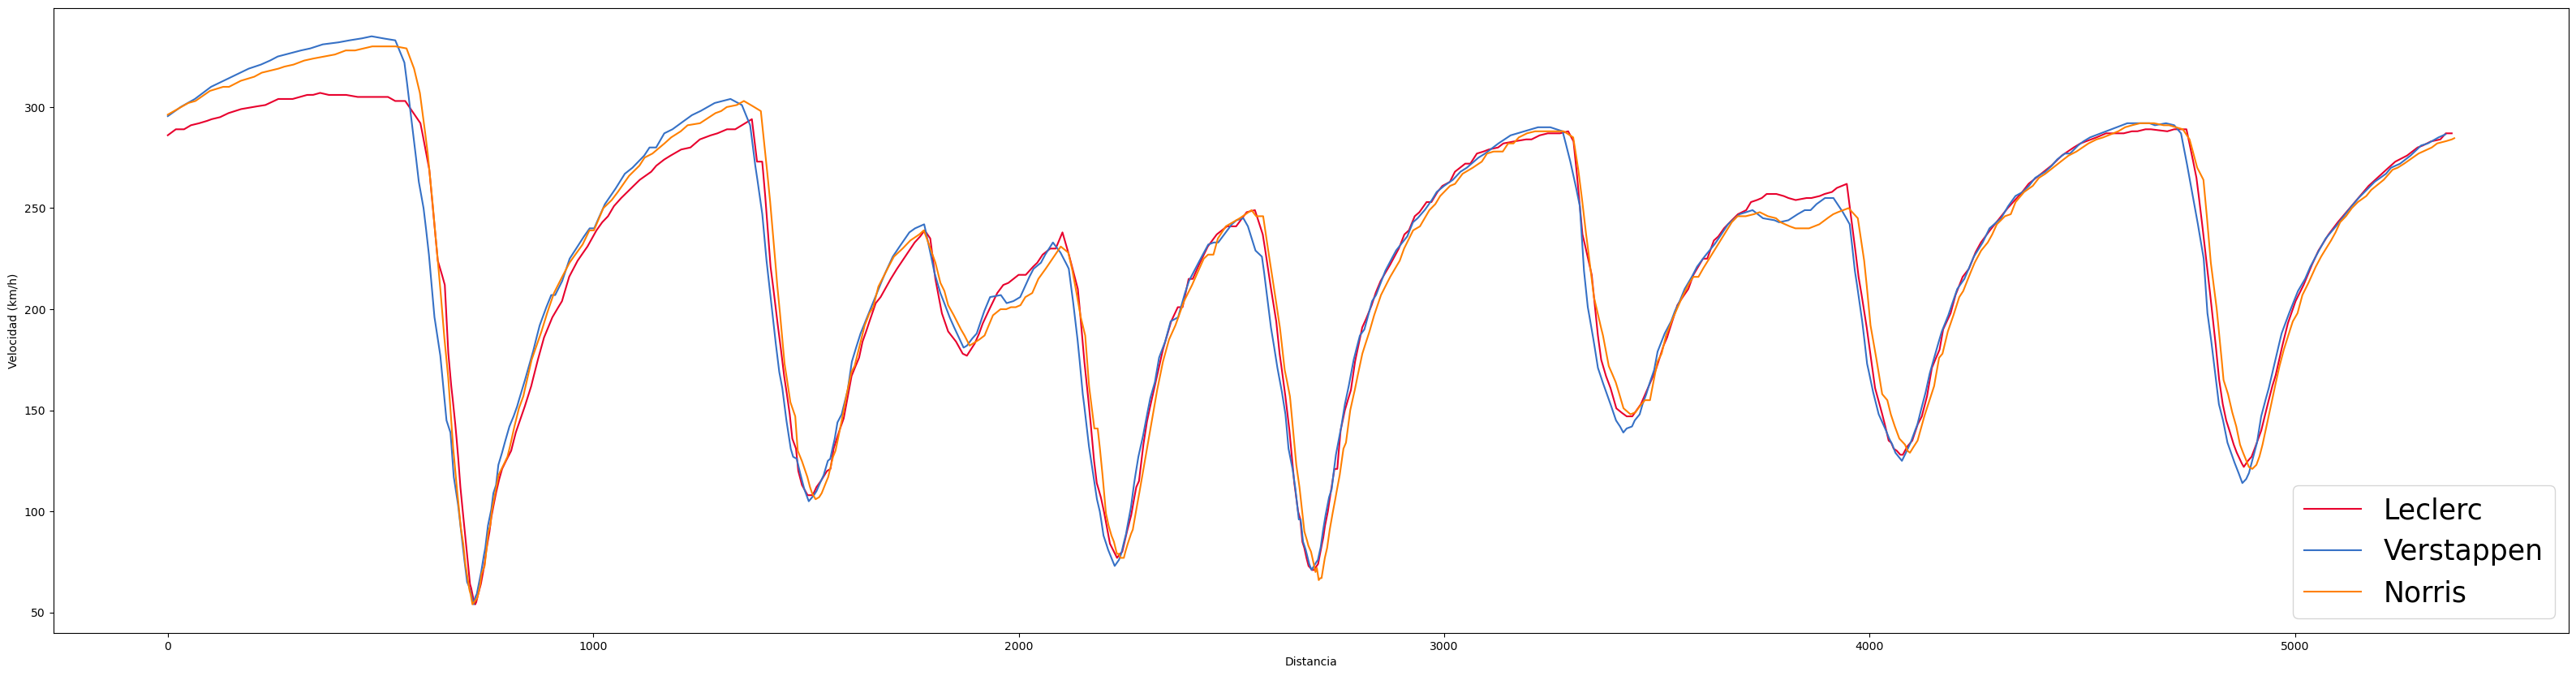

In [40]:
plt.figure(figsize=(40,10))
tel = leclerc.get_telemetry()
plt.plot(tel['Distance'], tel['Speed'], label='Leclerc',color='#e8002d')
plt.plot(verstappen.get_telemetry()['Distance'], verstappen.get_telemetry()['Speed'], label='Verstappen',color='#3671c6')
plt.plot(norris.get_telemetry()['Distance'],norris.get_telemetry()['Speed'], label='Norris',color='#ff8000')
plt.xlabel('Distancia')
plt.ylabel('Velocidad (km/h)')
plt.legend(fontsize=25,loc = 'lower right')
plt.show();